## --------------- Principle Component Analysis(PCA) -------------------

In [1]:
#  Importations

import numpy as np
import pandas as pd
import matplotlib
import random as rd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 6)

In [2]:
# Generating random data structure

# Generating random gene names
genes = ["gene" + str(i) for i in range(1, 101)]
# Generating arrays of sample names - wild-type -- knock-out
wt = ["wt" + str(i) for i in range(1, 6)]
ko = ["ko" + str(i) for i in range(1, 6)]
# Creating a pandas dataframe - the *unpack
data = pd.DataFrame(columns = [*wt ,*ko], index = genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Generating random data

for gene in data.index:
    data.loc[gene, "wt1": "wt5"] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
    data.loc[gene, "ko1": "ko5"] = np.random.poisson(lam = rd.randrange(12, 1000), size = 5)
data = data.astype(int)

data.head(3)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,846,851,859,827,845,37,29,44,33,33
gene2,832,815,759,829,754,61,59,57,87,60
gene3,547,545,562,570,563,102,82,104,94,99


In [4]:
# Summary information

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, gene1 to gene100
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wt1     100 non-null    int32
 1   wt2     100 non-null    int32
 2   wt3     100 non-null    int32
 3   wt4     100 non-null    int32
 4   wt5     100 non-null    int32
 5   ko1     100 non-null    int32
 6   ko2     100 non-null    int32
 7   ko3     100 non-null    int32
 8   ko4     100 non-null    int32
 9   ko5     100 non-null    int32
dtypes: int32(10)
memory usage: 8.8+ KB


In [5]:
# Summary statistics

data.describe()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,567.780000,567.470000,564.140000,568.440000,565.920000,504.880000,504.870000,510.540000,507.630000,504.550000
std,264.233811,264.117416,264.454805,262.676639,262.740287,290.036058,294.167329,290.881677,288.036006,289.499337
min,17.000000,17.000000,18.000000,9.000000,16.000000,11.000000,15.000000,10.000000,11.000000,14.000000
25%,390.750000,375.500000,386.500000,392.750000,414.750000,230.250000,227.500000,232.750000,230.000000,225.000000
50%,580.000000,589.500000,586.000000,584.500000,583.500000,518.000000,532.000000,540.000000,540.500000,515.500000
75%,786.250000,765.750000,754.500000,786.000000,775.500000,751.000000,754.000000,760.000000,766.500000,758.500000
max,1003.000000,1032.000000,1000.000000,998.000000,993.000000,982.000000,994.000000,1017.000000,974.000000,994.000000


## Scaling

- Scaling - mean of 0 and std of 1
- We use rows as columns because that is how genomic data is stored

- In scikit learn variation is calculated:

      (measurement - mean)**2 / number of measurements

In [6]:
# Scaling - mean of 0 and std of 1
# We use rows as columns because that is how genomic data is stored

scaled_data = preprocessing.scale(data.T)
scaled_data

array([[ 1.00077873,  1.09068438,  0.95419891,  1.07470365,  1.34056208,
        -2.53601409, -1.13782015, -0.8957972 , -0.38050165, -0.98866597,
         0.99121554,  1.07325276, -0.91560259,  1.07195064,  1.18305508,
         0.18513169, -1.00173404,  0.24812446, -1.1739658 ,  0.88884859,
        -1.62104125,  0.99500508,  1.00111007, -0.80727522, -0.92380296,
         0.91615006,  1.11082311,  0.98376371, -0.95704658, -1.01367122,
         0.96929196, -0.61351455,  0.81563341, -1.07652409,  0.95672164,
         1.16010348,  0.88900949, -0.75316577, -0.88365576,  1.0586044 ,
        -1.15943828,  0.93168151, -0.9648365 ,  0.28295227, -1.22655481,
        -0.98443124,  0.99352448, -1.03019216, -2.40505667,  1.04396248,
         1.45934297, -0.92780538,  1.11894664,  1.12322526, -0.6039432 ,
        -0.83943532, -1.02182239, -1.08372377, -0.11776161,  1.01437489,
         0.98276862, -0.69966492, -0.99135471,  0.7435756 , -1.12702825,
         0.96647504,  1.04409951, -1.03136204, -1.0

In [7]:
# Initializing principle component analysis

pca  = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data[:3]

array([[ 9.63302014e+00, -7.71319179e-01,  3.63501135e+00,
         4.25991903e-01, -1.13423181e+00,  2.31945429e-01,
        -4.18486227e-01, -4.16244302e-02,  5.99422501e-01,
         1.03757388e-15],
       [ 9.42917574e+00, -1.43132336e+00, -1.43044874e+00,
        -1.95257977e-01, -1.07863835e+00,  1.26303266e+00,
        -3.50124681e-01, -1.15268447e+00, -1.02352294e+00,
         1.03757388e-15],
       [ 9.11761571e+00, -1.18615034e+00,  3.13215668e-01,
         8.83833258e-01,  3.13796209e+00, -4.28119165e-01,
         5.90120522e-01,  3.30878921e-01, -4.41170099e-01,
         1.03757388e-15]])

In [8]:
# Calculating the percentage variation each principle component accounts for

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
per_var

array([87.8,  2.6,  2.2,  2. ,  1.6,  1.4,  1.2,  0.6,  0.5,  0. ])

In [9]:
# Creating labels for the scree plot - > PC1, PC2, ...., PCn

labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Text(0, 0.5, 'Percentage of explained variance ratio')

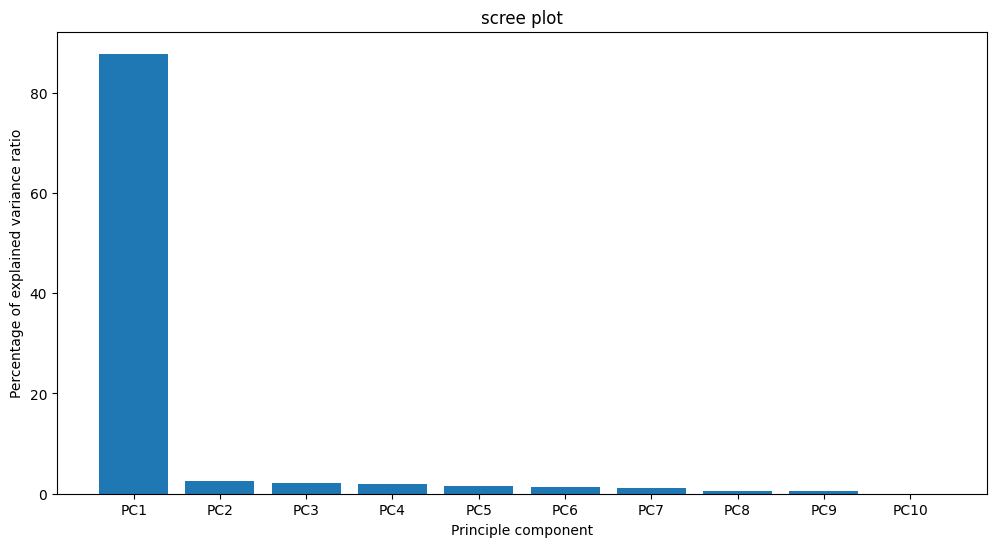

In [10]:
# Creating a Scree plot

plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.title("scree plot")
plt.xlabel("Principle component")
plt.ylabel("Percentage of explained variance ratio")

## Drawing a PCA plot

To draw a pca plot, we'll first put the new coordinates created by **pca.transform(scaled_data)** into a nice matrix
where the rows have sample labels and the columns have pc labels

In [14]:
# Creating the pca data

pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.633020,-0.771319,3.635011,0.425992,-1.134232,0.231945,-0.418486,-0.041624,0.599423,1.037574e-15
wt2,9.429176,-1.431323,-1.430449,-0.195258,-1.078638,1.263033,-0.350125,-1.152684,-1.023523,1.037574e-15
wt3,9.117616,-1.186150,0.313216,0.883833,3.137962,-0.428119,0.590121,0.330879,-0.441170,1.037574e-15
wt4,9.223029,0.780314,-1.665418,-0.611335,-0.473407,-0.557320,-1.824149,1.385241,0.212486,1.037574e-15
wt5,9.444199,2.604078,-0.919386,-0.483504,-0.374771,-0.500046,1.980659,-0.510303,0.660491,1.037574e-15
ko1,-9.299080,-1.271561,-0.746153,2.699369,-1.503559,-1.212597,0.880302,0.498637,-0.175641,1.037574e-15
ko2,-9.522697,-1.894096,-1.036610,-0.803901,0.806653,-0.287840,-0.695018,-0.880431,1.336770,1.037574e-15
ko3,-9.390023,-0.132477,0.101524,-0.992273,0.053529,2.592809,1.010206,1.060399,0.056545,1.037574e-15
ko4,-9.182372,0.237102,1.214999,-2.630889,-0.189280,-1.714804,0.114649,-0.063944,-0.940740,1.037574e-15
ko5,-9.452867,3.065434,0.533266,1.707965,0.755743,0.612939,-1.288158,-0.626170,-0.284639,1.037574e-15


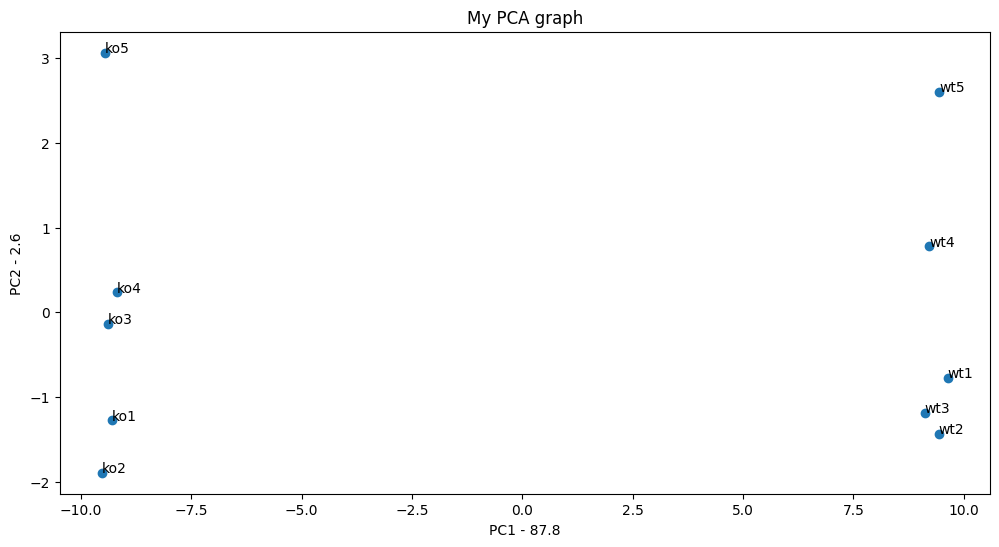

In [20]:
# Drawing a scatter plot

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA graph")
plt.xlabel(f"PC1 - {per_var[0]}")
plt.ylabel(f"PC2 - {per_var[1]}")

# Adding sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()    

## Analysis 

- The **ko** values cluster on one side suggesting they are correlated to one another 
- This is also same for the **xo** values clustered on the other side
- The difference in length of the ko and xo values along the x-axis suggest that the two are of very different nature

## Loading scores

Lets look at the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [21]:
# We are taking a look at PC1 hence we use --> pca.components_[0]

loading_scores = pd.Series(pca.components_[0], index = genes)
loading_scores

gene1      0.106681
gene2      0.106499
gene3      0.106602
gene4      0.101455
gene5      0.105294
             ...   
gene96    -0.105895
gene97     0.105775
gene98    -0.106674
gene99    -0.102634
gene100    0.106049
Length: 100, dtype: float64

In [22]:
# Sorting loading scores based on the maginitude

sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
sorted_loading_scores

gene1     0.106681
gene98    0.106674
gene91    0.106672
gene71    0.106650
gene31    0.106628
            ...   
gene49    0.042387
gene6     0.036370
gene93    0.036251
gene82    0.011645
gene18    0.007311
Length: 100, dtype: float64

In [25]:
# Getting the top 10 genes

top_10_genes = sorted_loading_scores[0: 10].index.values
top_10_genes

array(['gene1', 'gene98', 'gene91', 'gene71', 'gene31', 'gene48', 'gene3',
       'gene11', 'gene14', 'gene90'], dtype=object)

## Analysis 

The values for the loading scores are pretty similar hence most of them plates a major role in separating the samples rather than just one or two